## 'Green Eggs And Ham' by Dr. Seuss

#### In 1960, Dr. Seuss wrote a 34 page children's book using a vocabulary of only 50 words.
#### This is an analysis of those words...

In [1]:
# import modules
import os
import re # might use
import matplotlib
import seaborn # exploratory
import numpy as np
import pandas as pd
import nltk
# PunktSentencetokenizer is an unsupervised machine learning tokenizer
from nltk.tokenize import PunktSentenceTokenizer
# download the averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\grant.bucher\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

##### Set up our variables and pandas DataFrame

In [2]:
# set path
path = 'Q:\\My Documents\\Python Q Drive\\Python Q Drive Datasets\\'

# set file
f = 'Green Eggs and Ham Word Analysis.xlsx'

# change directory
chdir = os.chdir(path)

# variable for full_file_path
full_file_path = path + f
print(full_file_path)

# assign df to pandas read excel sheet 'Green Eggs and Ham' from full_file_path
df = pd.read_excel(full_file_path, sheet_name='Green Eggs and Ham')

Q:\My Documents\Python Q Drive\Python Q Drive Datasets\Green Eggs and Ham Word Analysis.xlsx


In [3]:
# print index, column name, and data type
i = 0
column_names_index = []
for index in df.columns.values:
    column_names_index.append(str(i) + ": " + index + " - " + str(df.iloc[i].dtypes))
    i += 1
# print index, column, data for each line
# map string to field if not all str
print('\n'.join(map(str, column_names_index)))

0: Word Index - object
1: Word - object
2: Page - object
3: Amy - POS - object
4: Order Word Appeared - object


In [4]:
# preview beginning rows
print(df.head())

   Word Index Word  Page Amy - POS  Order Word Appeared
0           1    I     6   pronoun                    1
1           2   am     6      verb                    2
2           3  sam     6      noun                    3
3           4  sam     7      noun                    3
4           5    I     7   pronoun                    1


##### We will be comparing user detected Part of Speech (Amy - POS) vs nltk POS

In [5]:
# preview end rows
print(df.tail())

     Word Index   Word  Page Amy - POS  Order Word Appeared
804         805  thank    34      verb                   50
805         806    you    34      noun                    8
806         807    sam    34      noun                    3
807         808      I    34   pronoun                    1
808         809     am    34      verb                    2


##### How many distinct words are in Green Eggs and Ham?

In [6]:
# create pd series
# s_distinct_words = pd.Series(pd.Categorical(df['Word'])).unique()
s_distinct_words = pd.Series(df['Word'].unique()).tolist()
print(s_distinct_words)
print('\n')
print('There are ' + str(len(s_distinct_words)) + ' distinct words in Green Eggs and Ham')

['I', 'am', 'sam', 'that', 'do', 'not', 'like', 'you', 'green', 'eggs', 'and', 'ham', 'them', 'would', 'here', 'or', 'there', 'anywhere', 'in', 'a', 'house', 'with', 'mouse', 'eat', 'box', 'fox', 'could', 'car', 'they', 'are', 'may', 'will', 'see', 'tree', 'let', 'me', 'be', 'train', 'on', 'say', 'the', 'dark', 'rain', 'goat', 'boat', 'so', 'try', 'if', 'good', 'thank']


There are 50 distinct words in Green Eggs and Ham


##### Let's reshape the data for our analysis

In [7]:
# get count of unique words
# using series and value_counts()
# df = df['Word'].value_counts()
# using dataframe, groupby, and count
# df = df.groupby('Word')['Word'].count()

# new DataFrame for words and count
df1 = pd.DataFrame(df['Word'].values, columns = ['Word'])

# add count of words
df1['Count'] = df1.Word.groupby(df1.Word).transform('count')

# let's add the page number and user completed POS to df1
df1 = df1.join(df[['Page','Amy - POS']])

# rename columns
df1 = df1.rename({'Amy - POS':'User POS'}, axis='columns')

print(df1.head())

  Word  Count  Page User POS
0    I     84     6  pronoun
1   am     15     6     verb
2  sam     18     6     noun
3  sam     18     7     noun
4    I     84     7  pronoun


##### What words were used most often?

In [8]:
# df2 has dropped duplicates for easy viewing on columns [['Word','Count']]
df2 = df1[['Word','Count']].drop_duplicates()

# print word count, descending
print('Top 10 Words by Count: ' + '\n' + '\n' + str(df2.sort_values(by='Count',ascending=False).reset_index(drop=True).head(10)))

Top 10 Words by Count: 

    Word  Count
0      I     84
1    not     84
2   them     61
3      a     59
4   like     44
5     in     40
6     do     37
7    you     34
8  would     26
9    and     25


##### In what pages do the words appear?

In [9]:
# create a dictionary for {word : [pages, pages, pages...]}
word_count_dict = {}

# for word in unique list of words from df['Word'] columns
for word in df1['Word'].unique().tolist():
#     list_slice is dataframe where word = each word in word list
    list_slice = df1[df1['Word'] == word]
#     assign word from list in word_count_dict key
#     the values of page column for that word, into a list
    word_count_dict[word] = list_slice['Page'].tolist()
# print(word_count_dict)
        
for i in word_count_dict:
    print(i + ' is on pages: ' + str(word_count_dict[i]) + '\n')

I is on pages: [6, 7, 8, 8, 8, 8, 10, 10, 10, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 17, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 23, 23, 23, 23, 24, 24, 25, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 29, 29, 30, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34]

am is on pages: [6, 7, 8, 8, 8, 10, 12, 14, 16, 19, 21, 24, 29, 32, 34]

sam is on pages: [6, 7, 8, 8, 8, 10, 12, 14, 16, 19, 21, 21, 23, 24, 29, 31, 32, 34]

that is on pages: [8, 8, 8]

do is on pages: [8, 9, 10, 10, 12, 12, 14, 14, 14, 14, 14, 14, 16, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 23, 23, 24, 24, 27, 27, 27, 27, 27, 28, 29, 30, 32, 34]

not is on pages: [8, 10, 10, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 25, 25, 27, 27, 27, 27, 27, 

##### Create full text list and distinct words

In [10]:
# create list of full text
full_text_list = pd.Series(df['Word']).tolist()
# print sample of full text
print('Sample list of full text:')
print(full_text_list[:22])

Sample list of full text:
['I', 'am', 'sam', 'sam', 'I', 'am', 'that', 'sam', 'I', 'am', 'that', 'sam', 'I', 'am', 'I', 'do', 'not', 'like', 'that', 'sam', 'I', 'am']


In [11]:
# use s_distrinct_words series and create distinct word list
# s_distinct_words = pd.Series(pd.Categorical(df['Word'])).unique()
print('List of distinct words:')
print(s_distinct_words)

# could do as a set but let's keep using pandas
# full_text_set = sorted(set(full_text_list), key=full_text_list.index)

List of distinct words:
['I', 'am', 'sam', 'that', 'do', 'not', 'like', 'you', 'green', 'eggs', 'and', 'ham', 'them', 'would', 'here', 'or', 'there', 'anywhere', 'in', 'a', 'house', 'with', 'mouse', 'eat', 'box', 'fox', 'could', 'car', 'they', 'are', 'may', 'will', 'see', 'tree', 'let', 'me', 'be', 'train', 'on', 'say', 'the', 'dark', 'rain', 'goat', 'boat', 'so', 'try', 'if', 'good', 'thank']


In [12]:
# assign distinct words to string variable
distinct_words_str = (" ".join(s_distinct_words))
print('Distinct words as str:')
print(distinct_words_str)

Distinct words as str:
I am sam that do not like you green eggs and ham them would here or there anywhere in a house with mouse eat box fox could car they are may will see tree let me be train on say the dark rain goat boat so try if good thank


### Let's start using nltk!

##### What parts of speech were used?

In [13]:
# tokenize set of text
tokenized = PunktSentenceTokenizer(distinct_words_str).tokenize(distinct_words_str)

def process_content():
    try:
#         for each word in tokenized (full text)
        for i in tokenized:
#         assign the nltk.word_tokenize to word
            words = nltk.word_tokenize(i)
#         assign nltk.pos_tag to the word
            tagged = nltk.pos_tag(words)
#         print the word and POS
#             print(tagged)
            return tagged
    except Exception as e:
        print(str(e))
# RUN IT!
process_content()

[('I', 'PRP'),
 ('am', 'VBP'),
 ('sam', 'JJ'),
 ('that', 'WDT'),
 ('do', 'VBP'),
 ('not', 'RB'),
 ('like', 'IN'),
 ('you', 'PRP'),
 ('green', 'VBP'),
 ('eggs', 'NNS'),
 ('and', 'CC'),
 ('ham', 'VB'),
 ('them', 'PRP'),
 ('would', 'MD'),
 ('here', 'RB'),
 ('or', 'CC'),
 ('there', 'RB'),
 ('anywhere', 'RB'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('house', 'NN'),
 ('with', 'IN'),
 ('mouse', 'NN'),
 ('eat', 'NN'),
 ('box', 'NN'),
 ('fox', 'NN'),
 ('could', 'MD'),
 ('car', 'NN'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('may', 'MD'),
 ('will', 'MD'),
 ('see', 'VB'),
 ('tree', 'JJ'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('be', 'VB'),
 ('train', 'VBN'),
 ('on', 'IN'),
 ('say', 'VBP'),
 ('the', 'DT'),
 ('dark', 'JJ'),
 ('rain', 'NN'),
 ('goat', 'NN'),
 ('boat', 'NN'),
 ('so', 'RB'),
 ('try', 'VB'),
 ('if', 'IN'),
 ('good', 'JJ'),
 ('thank', 'NN')]

##### This is hard to read; do we have a key?

In [14]:
pos_tag_dict = {
    'CC' : 'coordinating conjunction',
    'CD' : 'cardinal digit',
    'DT' : 'determiner',
    'EX' : 'existential there',
    'FW' : 'foreign word',
    'IN' : 'preposition/subordinating conjunction',
    'JJ' : 'adjective',
    'JJR' : 'adjective, comparative',
    'JJS' : 'adjective, superlative',
    'LS' : 'list maker',
    'MD' : 'modal',
    'NN' : 'noun, singular',
    'NNS' : 'noun plural',
    'NNP' : 'proper noun, singular',
    'NNPS' : 'proper noun, singular',
    'PDT' : 'predeterminer',
    'POS' : 'possessive ending',
    'PRP' : 'possessive pronoun',
    'RB' : 'adverb',
    'RBR' : 'adverb, comparative',
    'RBS' : 'adverb, superlative',
    'RP' : 'particle',
    'TO' : 'to go',
    'UH' : 'interjection',
    'VB' : 'verb, base form',
    'VBD' : 'verb, past tense',
    'VBG' : 'verb, gerund/present participle',
    'VBN' : 'verb past participle',
    'VBP' : 'ver, sing. present, non-3d',
    'VBZ' : 'verb, 3rd person sing. present',
    'WDT' : 'wh-determiner',
    'WP' : 'wh-pronoun',
    'WP' : 'possessive wh-pronoun',
    'WRB' : 'wh-adverb'   
}

In [15]:
# get POS from process_content function
pos_return = process_content()
# join POS key with POS value from pos_tag_dict
# new dict to store {word: POS meaning}
pos_nltk_dict = {}

# for word and pos_key in pos_return (function return value)
for word, pos_key in pos_return:
#     if pos_key in post_tag_dict ({pos_key : pos_value})
    if pos_key in pos_tag_dict:
#     add word as key to pos_nltk_dict
#     add pos_tag_dict[pos_key] to value for key above
#     dict structure will be:
#     pos_nltk_dict = {word: pos_value}   
        pos_nltk_dict[word]=pos_tag_dict[pos_key]
        
print(pos_nltk_dict)

{'I': 'possessive pronoun', 'am': 'ver, sing. present, non-3d', 'sam': 'adjective', 'that': 'wh-determiner', 'do': 'ver, sing. present, non-3d', 'not': 'adverb', 'like': 'preposition/subordinating conjunction', 'you': 'possessive pronoun', 'green': 'ver, sing. present, non-3d', 'eggs': 'noun plural', 'and': 'coordinating conjunction', 'ham': 'verb, base form', 'them': 'possessive pronoun', 'would': 'modal', 'here': 'adverb', 'or': 'coordinating conjunction', 'there': 'adverb', 'anywhere': 'adverb', 'in': 'preposition/subordinating conjunction', 'a': 'determiner', 'house': 'noun, singular', 'with': 'preposition/subordinating conjunction', 'mouse': 'noun, singular', 'eat': 'noun, singular', 'box': 'noun, singular', 'fox': 'noun, singular', 'could': 'modal', 'car': 'noun, singular', 'they': 'possessive pronoun', 'are': 'ver, sing. present, non-3d', 'may': 'modal', 'will': 'modal', 'see': 'verb, base form', 'tree': 'adjective', 'let': 'verb, base form', 'me': 'possessive pronoun', 'be': 'v

##### Are we re-running code?

In [16]:
# sample data and
# check if 'nltk POS' columns is in the dataframe
print(df1.head(3))

  Word  Count  Page User POS
0    I     84     6  pronoun
1   am     15     6     verb
2  sam     18     6     noun


In [17]:
# EASY WAY TO MAP DICT TO EXISTING DATAFRAME
# add nltk POS from pos_nltk_dict
# call map and pass in dictionary
# this will perform a lookup and return the associated value for that key
# df1['nltk POS'] = df1['Word'].map(pos_nltk_dict)

# can be done with creating new df
# passing list of dictionary items and assigning columns
# df4 = pd.DataFrame(list(pos_nltk_dict.items()), columns=['Word','nltk POS'])

In [20]:
# create new df with from_dict()
df5 = pd.DataFrame.from_dict(pos_nltk_dict, orient='index', dtype='object')
# reset_index inplace
df5.reset_index(inplace=True)
# rename columns inplace
df5.rename({'index': 'Word', 0: 'nltk POS'}, axis='columns', inplace=True)

print(df5.head())

   Word                    nltk POS
0     I          possessive pronoun
1    am  ver, sing. present, non-3d
2   sam                   adjective
3  that               wh-determiner
4    do  ver, sing. present, non-3d


In [21]:
# JOIN CODE BLOCK
# join new DataFrame from dict (df5) to primary df1
# set df5 index to 'Word' so can join on='Word' with df1
if 'nltk POS' not in df1.columns:
    df1 = df1.join(df5.set_index('Word'), on='Word', lsuffix='_left', rsuffix='_right')
    
# *****
# if JOIN CODE BLOCK is ran more than once, _left and _right columns will be added
# code below will drop those columns
# *****
      
for column in df1.columns:
    if column == 'nltk POS_left':
        pass
        df1.drop(columns=[column], inplace=True)
    elif column == 'nltk POS_right':
        pass
        df1.drop(columns=[column], inplace=True)

print(df1.head())

  Word  Count  Page User POS                    nltk POS
0    I     84     6  pronoun          possessive pronoun
1   am     15     6     verb  ver, sing. present, non-3d
2  sam     18     6     noun                   adjective
3  sam     18     7     noun                   adjective
4    I     84     7  pronoun          possessive pronoun


In [30]:
# create new dataframe with cout of words on each page
df6 = df1[['Word','Page']]

# df6 is now df1's Word, Page coumns and added Cnt_word_per_pg column
df6 = df6.assign(Cnt_Words_per_pg=df1['Page'].groupby(df1['Page']).transform('count'))

# sample df6
print(df6.head())

# join Cnt_Words_per_pg column to df1
if 'Cnt_Words_per_pg' not in df1.columns:
# make sure column is not already there 
    df1 = df1.join(df6.set_index(['Page','Word']), on=['Page','Word'], lsuffix='_left', rsuffix='_right')

print(df1.head())

  Word  Page  Cnt_Words_per_pg
0    I     6                 3
1   am     6                 3
2  sam     6                 3
3  sam     7                 3
4    I     7                 3
  Word  Count  Page User POS                    nltk POS  Cnt_Words_per_pg
0    I     84     6  pronoun          possessive pronoun                 3
1   am     15     6     verb  ver, sing. present, non-3d                 3
2  sam     18     6     noun                   adjective                 3
3  sam     18     7     noun                   adjective                 3
4    I     84     7  pronoun          possessive pronoun                 3


##### Let's visualize something!

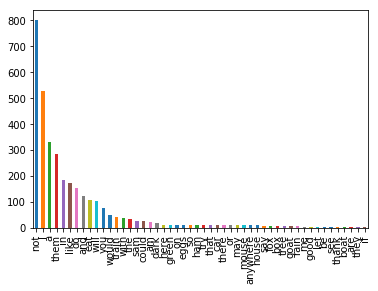

In [32]:
# run matplotlib inline
%matplotlib inline

# alpha is for transparency
# float (0.0 transparent through 1.0 opaque)
alpha_color = 0.5

df1['Word'].value_counts().plot(kind='bar')

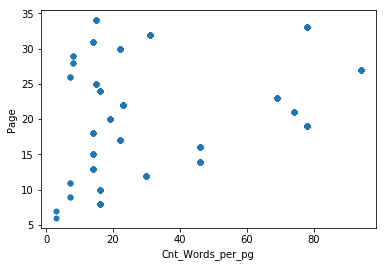

In [38]:
# scatter plot for words per page
df1.plot(x='Cnt_Words_per_pg', y='Page', kind='scatter')